<a href="https://colab.research.google.com/github/JannaBabicheva/lab01_ml_pipeline/blob/main/Babicheva_%22lab01_part3_svm_kernels_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook.

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

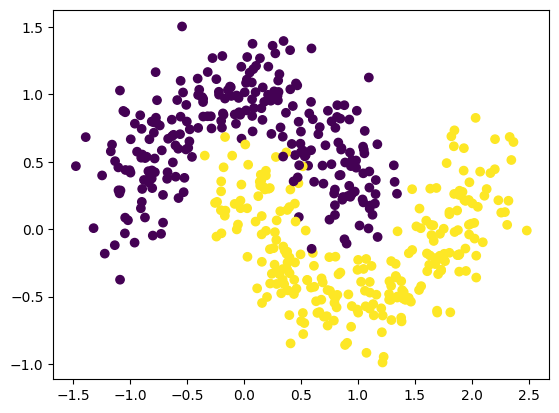

In [2]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from mlxtend.plotting import plot_decision_regions

lr = LogisticRegression() # add some params
svm = SVC(kernel='linear') # here too

### YOUR CODE HERE

In [4]:
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

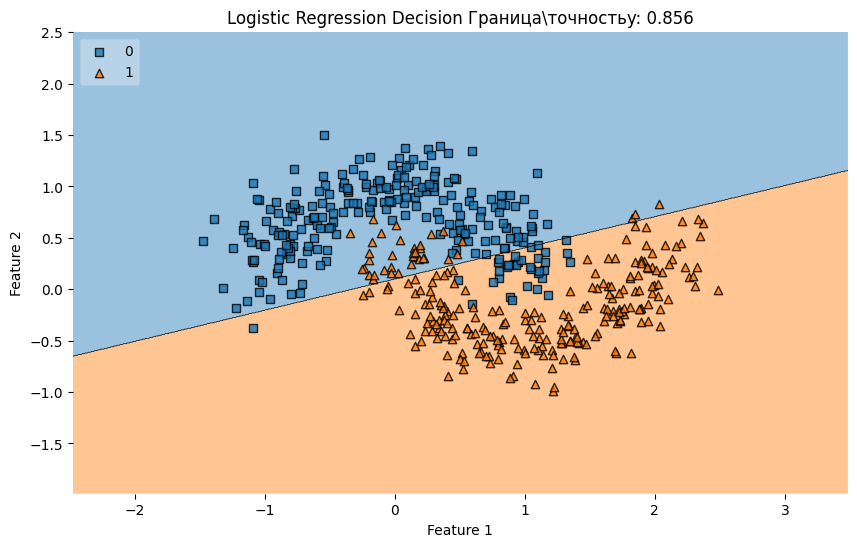

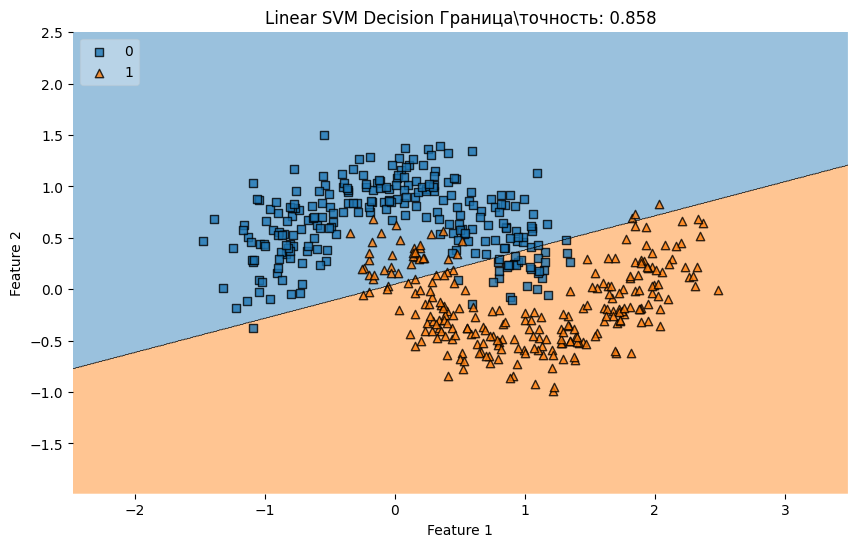

Logistic Regression Accuracy: 0.856
Linear SVM Accuracy: 0.858


In [14]:
def plot_decisions(X, y, estimator, title):

    # преобразование в массивы numpy
    X = np.array(X)
    y = np.array(y)

    # создание размера фигуры
    plt.figure(figsize=(10, 6))

    # График
    plot_decision_regions(X, y, clf=estimator, legend=2)

    # Добавление заголовок и надписей
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

#Генерация набора данных о лунах
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)

# Обозначение и трейн  Logistic Regression
lr = LogisticRegression(C=1.0, max_iter=1000, random_state=42)
lr.fit(moons_points, moons_labels)
lr_accuracy = accuracy_score(moons_labels, lr.predict(moons_points))

# бозначение и трейн  linear SVM
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(moons_points, moons_labels)
svm_accuracy = accuracy_score(moons_labels, svm.predict(moons_points))

# График результата
plot_decisions(moons_points, moons_labels, lr,
              f'Logistic Regression Decision Граница\точностьy: {lr_accuracy:.3f}')
plot_decisions(moons_points, moons_labels, svm,
              f'Linear SVM Decision Граница\точность: {svm_accuracy:.3f}')

print(f"Logistic Regression Accuracy: {lr_accuracy:.3f}")
print(f"Linear SVM Accuracy: {svm_accuracy:.3f}")


Обе линейные модели (логистическая регрессия и линейная SVM), как и ожидалось, не справляются с этим набором данных, поскольку набор данных moons не является линейно разделяемым.
Они достигают одинаковых показателей точности (около 0,85), но не могут отразить кривую границу принятия решения, необходимую для правильного разделения классов.
Созданная мной функция plot_decisions будет полезна для визуализации различных реализаций ядра в следующих задачах.

## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

In [ ]:
### YOUR CODE HERE

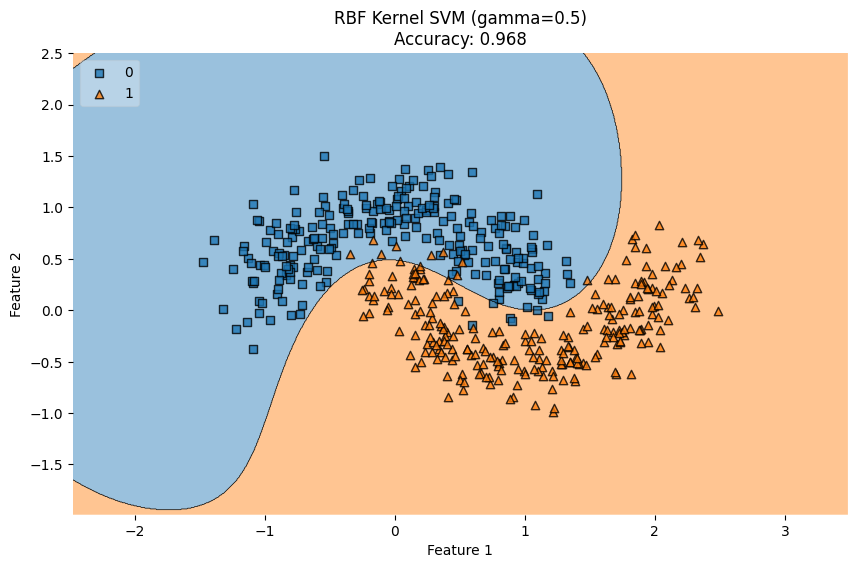

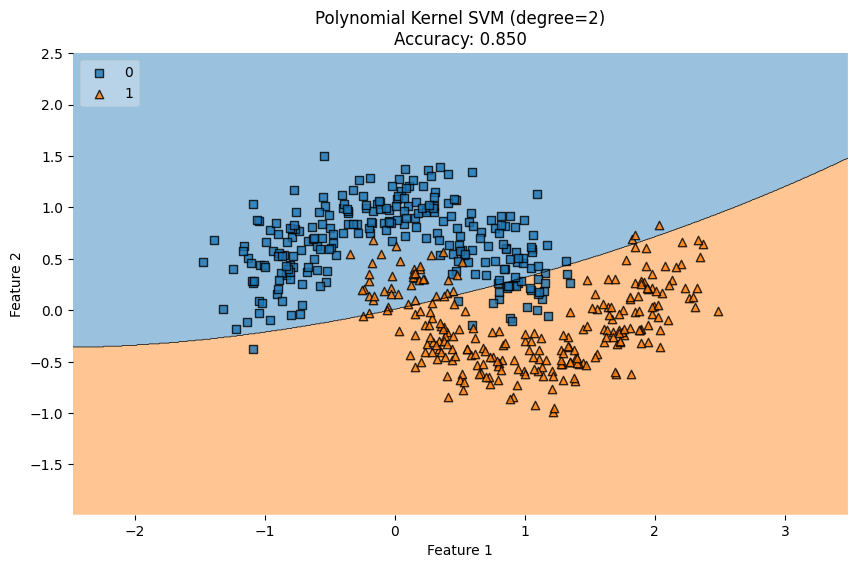

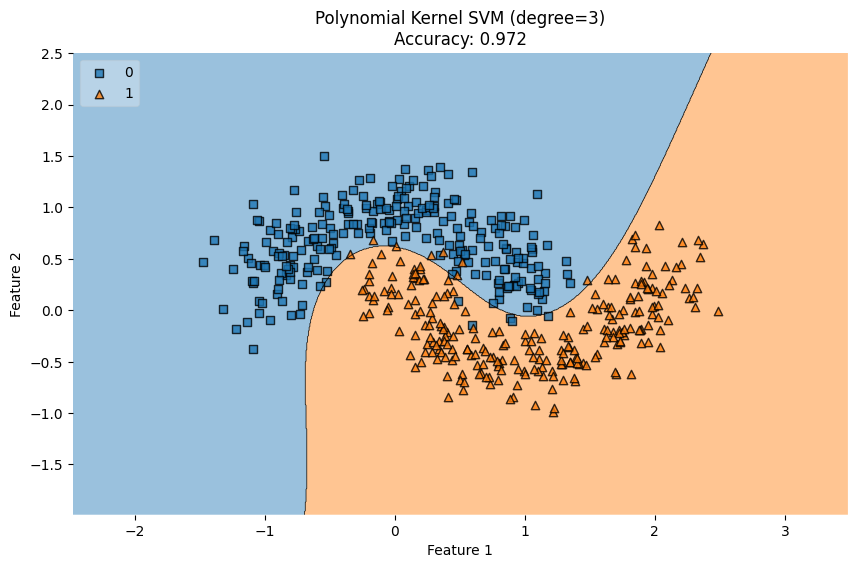

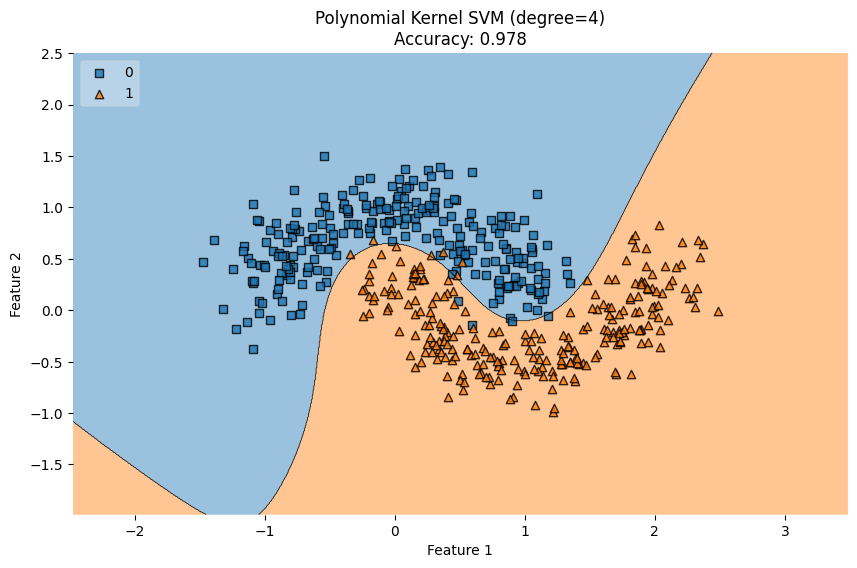

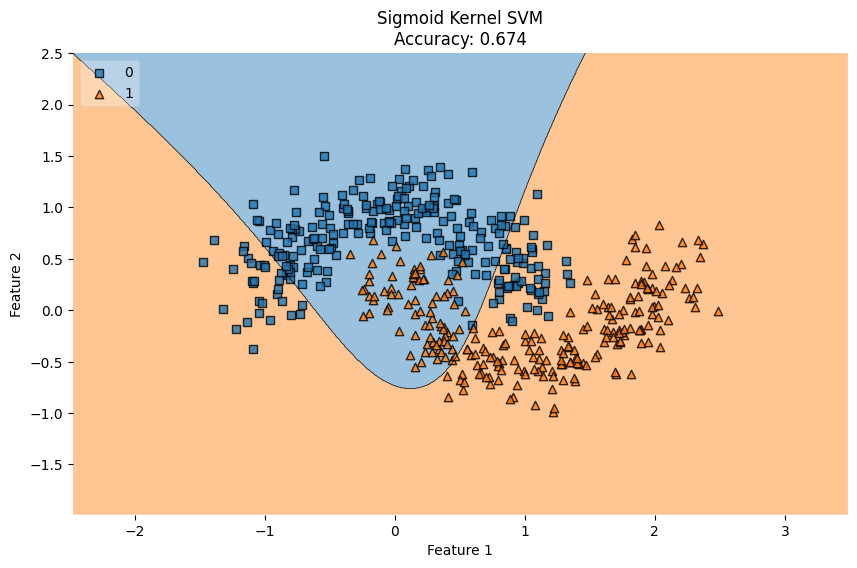


Accuracy scores for different kernels:
RBF: 0.968
Polynomial (degree=2): 0.850
Polynomial (degree=3): 0.972
Polynomial (degree=4): 0.978
Sigmoid: 0.674


In [15]:
def plot_decisions(X, y, estimator, title):

    plt.figure(figsize=(10, 6))
    plot_decision_regions(X, y, clf=estimator, legend=2)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# сгенерируем набор данных о лунах
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)

# Словарь для хранения результатов
kernel_results = {}

# 1. RBF Kernel
rbf_svm = SVC(kernel='rbf', C=1.0, gamma=0.5, random_state=42)
rbf_svm.fit(moons_points, moons_labels)
rbf_accuracy = accuracy_score(moons_labels, rbf_svm.predict(moons_points))
kernel_results['RBF'] = rbf_accuracy

plot_decisions(moons_points, moons_labels, rbf_svm,
              f'RBF Kernel SVM (gamma=0.5)\nAccuracy: {rbf_accuracy:.3f}')

# 2. Polynomial Kernel - тестирование различных степеней
degrees = [2, 3, 4]
poly_results = {}

for degree in degrees:
    poly_svm = SVC(kernel='poly', degree=degree, C=1.0, gamma='scale', coef0=1, random_state=42)
    poly_svm.fit(moons_points, moons_labels)
    poly_accuracy = accuracy_score(moons_labels, poly_svm.predict(moons_points))
    poly_results[degree] = poly_accuracy
    kernel_results[f'Polynomial (degree={degree})'] = poly_accuracy

    plot_decisions(moons_points, moons_labels, poly_svm,
                  f'Polynomial Kernel SVM (degree={degree})\nAccuracy: {poly_accuracy:.3f}')

# 3. Sigmoid Kernel
sigmoid_svm = SVC(kernel='sigmoid', C=1.0, gamma='scale', coef0=1, random_state=42)
sigmoid_svm.fit(moons_points, moons_labels)
sigmoid_accuracy = accuracy_score(moons_labels, sigmoid_svm.predict(moons_points))
kernel_results['Sigmoid'] = sigmoid_accuracy

plot_decisions(moons_points, moons_labels, sigmoid_svm,
              f'Sigmoid Kernel SVM\nAccuracy: {sigmoid_accuracy:.3f}')

# Print summary of results
print("\nAccuracy scores for different kernels:")
for kernel, accuracy in kernel_results.items():
    print(f"{kernel}: {accuracy:.3f}")


Анализ результатов:

1. Качество классификации:
- Ядро RBF работает очень хорошо с точностью 0,968
- Полиномиальные ядра демонстрируют интересную прогрессию:
  - Степень 2: 0,850
  - Степень 3: 0,972 (превосходит RBF)
  - Степень 4: 0,978 (лучший результат)
- Сигмовидное ядро работает плохо (0,674), что подтверждает его непригодность для этих данных

2. Анализ границ принятия решений (обновлено):
- RBF создает плавные границы, соответствующие Луне, как и ожидалось
- Полиномиальные ядра:
  - Степень 2 создает слишком простые границы (объясняет точность 0,850)
  - Степени 3 и 4 создают более сложные границы, которые лучше соответствуют структуре данных
- Неправильная граница ядра Sigmoid объясняет его низкую производительность

3. Выбор степени полинома:
- Лучше выбрать степень 3 или 4, потому что:
  - Степень 2 (0,850) явно недостаточна
  - Степень 3 (0,972) обеспечивает превосходную точность.
  - Степень 4 (0,978) дает несколько лучшие результаты, но может быть близка к переобучению

4. Выбор оптимальной модели:
- Хотя полиномиальное ядро 4-й степени обладает наивысшей точностью (0,978), лучше всего использовать ядро RBF (0,968) или полиномиальное ядро 3-й степени (0,972), учитывая, что:
  - Более простые границы принятия решений
  - Хороший баланс между точностью и сложностью
  - Меньше риск переобучения


## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

In [7]:
from sklearn.preprocessing import PolynomialFeatures

### YOUR CODE HERE

In [8]:
from sklearn.pipeline import Pipeline

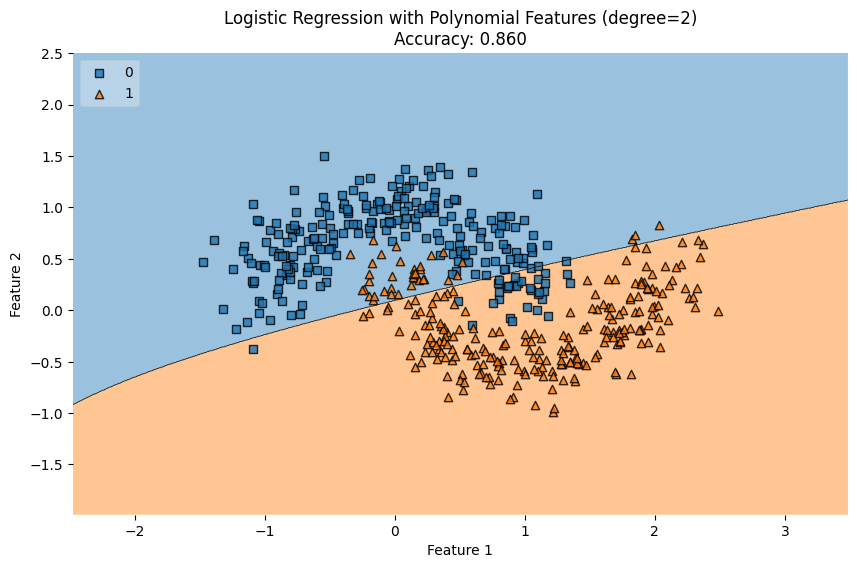

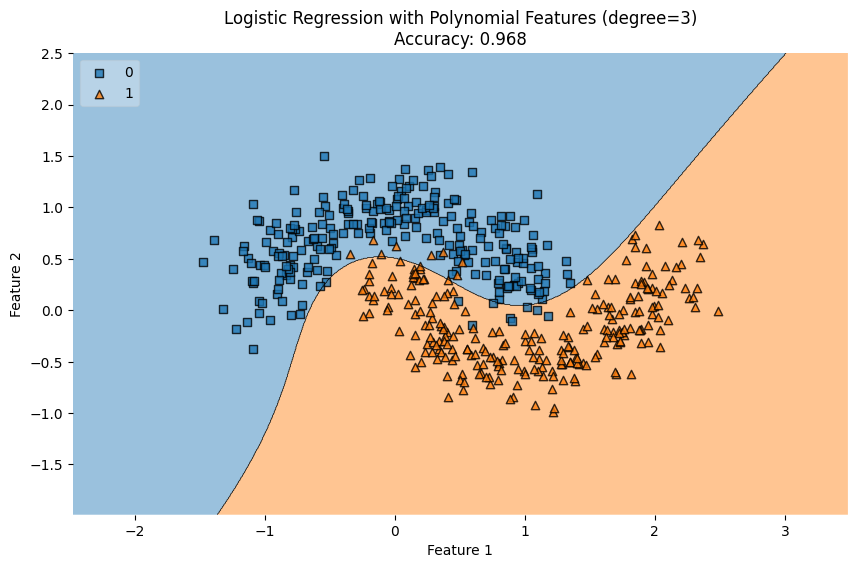

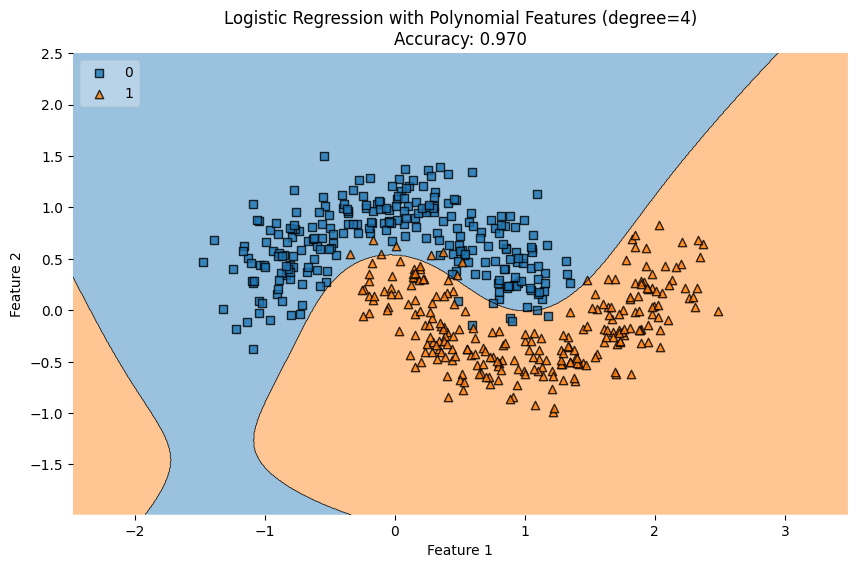


Accuracy scores for Logistic Regression with different polynomial degrees:
Degree 2: 0.860
Degree 3: 0.968
Degree 4: 0.970

Degree 2 polynomial features created 5 features from original 2 features

Degree 3 polynomial features created 9 features from original 2 features

Degree 4 polynomial features created 14 features from original 2 features


In [9]:
def plot_decisions(X, y, estimator, title):
    plt.figure(figsize=(10, 6))
    plot_decision_regions(X, y, clf=estimator, legend=2)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Сгенерируем moons dataset
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)

# Тестирование полиномиальных степеней
degrees = [2, 3, 4]
poly_lr_results = {}

for degree in degrees:
    # Создание конвейера с полиномиальными характеристиками и логистической регрессией
    poly_lr = Pipeline([
        ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
        ('lr', LogisticRegression(C=1.0, max_iter=1000, random_state=42))
    ])

    # Обучение pipeline
    poly_lr.fit(moons_points, moons_labels)

    # рассчет accuracy
    poly_lr_accuracy = accuracy_score(moons_labels, poly_lr.predict(moons_points))
    poly_lr_results[degree] = poly_lr_accuracy

    # график степеней
    plot_decisions(moons_points, moons_labels, poly_lr,
                  f'Logistic Regression with Polynomial Features (degree={degree})\nAccuracy: {poly_lr_accuracy:.3f}')

# печать результата
print("\nAccuracy scores for Logistic Regression with different polynomial degrees:")
for degree, accuracy in poly_lr_results.items():
    print(f"Degree {degree}: {accuracy:.3f}")

# печать количества функций для каждой степени
for degree in degrees:
    n_features = PolynomialFeatures(degree=degree, include_bias=False).fit_transform(moons_points).shape[1]
    print(f"\nDegree {degree} polynomial features created {n_features} features from original 2 features")


Результаты ясно показывают, что степень 3 является оптимальным выбором для этого набора данных, обеспечивая превосходный баланс между сложностью модели и производительностью.

1. Сравнение качества:
- Логистическая регрессия с полиномиальными признаками на самом деле работает лучше при более высоких степенях в этом наборе данных
- Степень 2 (0,860) работает относительно плохо
- Наблюдается значительный скачок точности со 2-й до 3-й степени (0,968)
- 4-я степень показывает лишь незначительное улучшение (0,970) по сравнению со степенью 3

2. Выбор оптимальной степени:
- 3-я степень представляется оптимальным выбором, поскольку:
  - Это обеспечивает значительное повышение точности по сравнению со степенью 2 (скачок с 0,860 до 0,968).
  - Создается только 9 объектов (по сравнению с 14 объектами для 4-й степени)
  - Минимальный прирост точности по сравнению с 4-й степенью (0,002) не оправдывает дополнительных 5 объектов

3. Анализ пространства объектов:
- Характеристики 2-й степени: 5 - недостаточны для определения кривизны спутников (это объясняет более низкую точность)
- Характеристики 3-й степени: 9 - оптимальны по соотношению сложности и производительности
- Характеристики 4-й степени: 14 - увеличивают сложность вычислений с минимальными затратами

4. Сравнение с SVM:
- Полиномиальное преобразование признаков с помощью LR (степень 3, точность 0,968) работает сравнимо с SVM ядра RBF, который мы видели ранее
- Это показывает, что при правильном проектировании признаков более простые модели, такие как логистическая регрессия, могут соответствовать производительности более сложных методов ядра.


## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

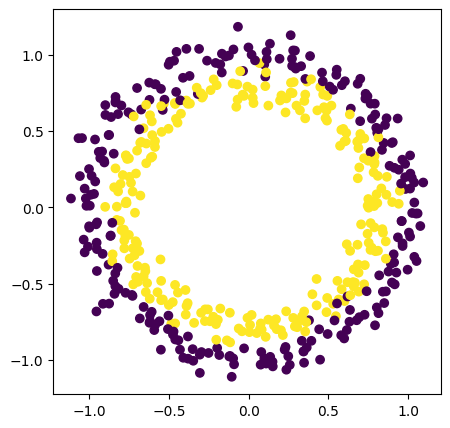

In [10]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

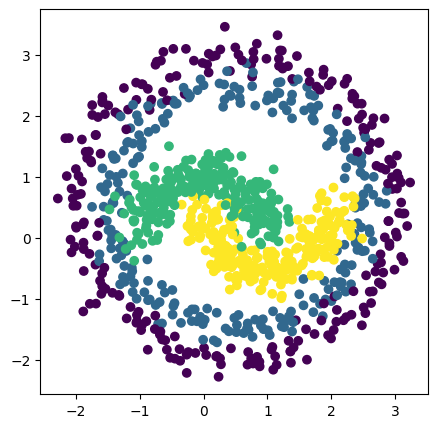

In [11]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

In [ ]:
### YOUR CODE HERE

In [12]:
from sklearn.datasets import make_moons, make_circles
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

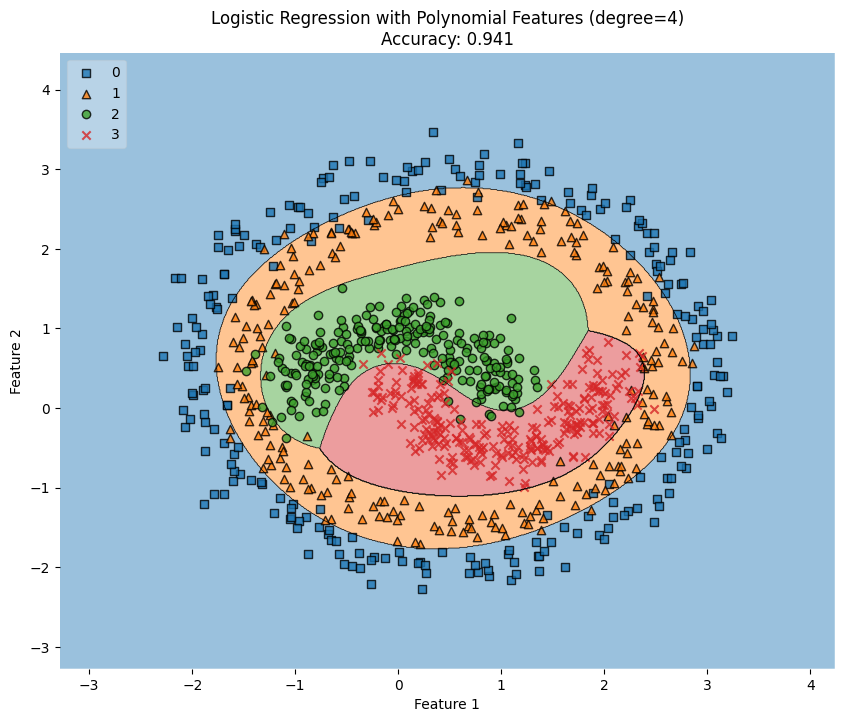

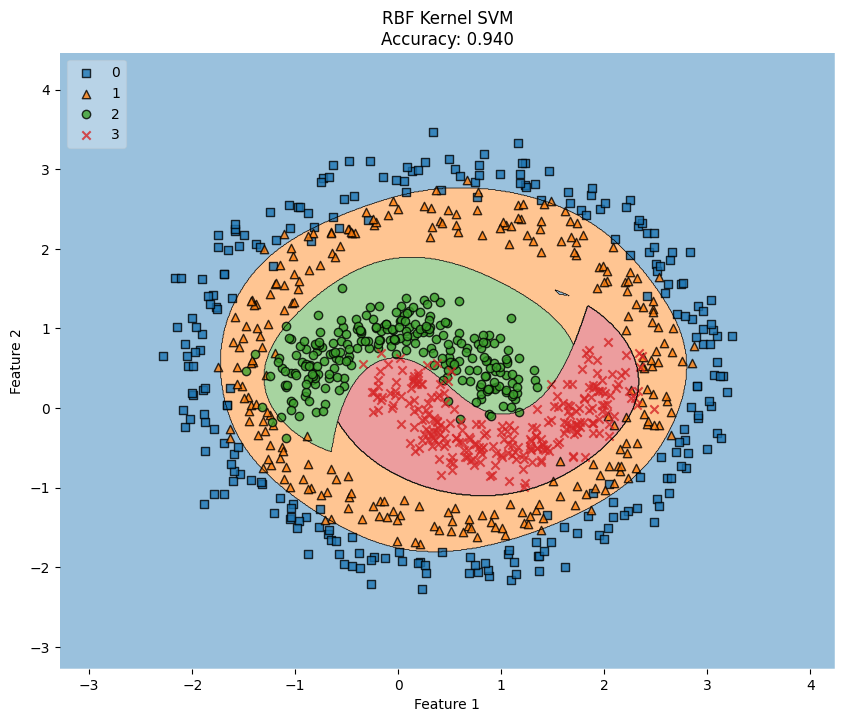

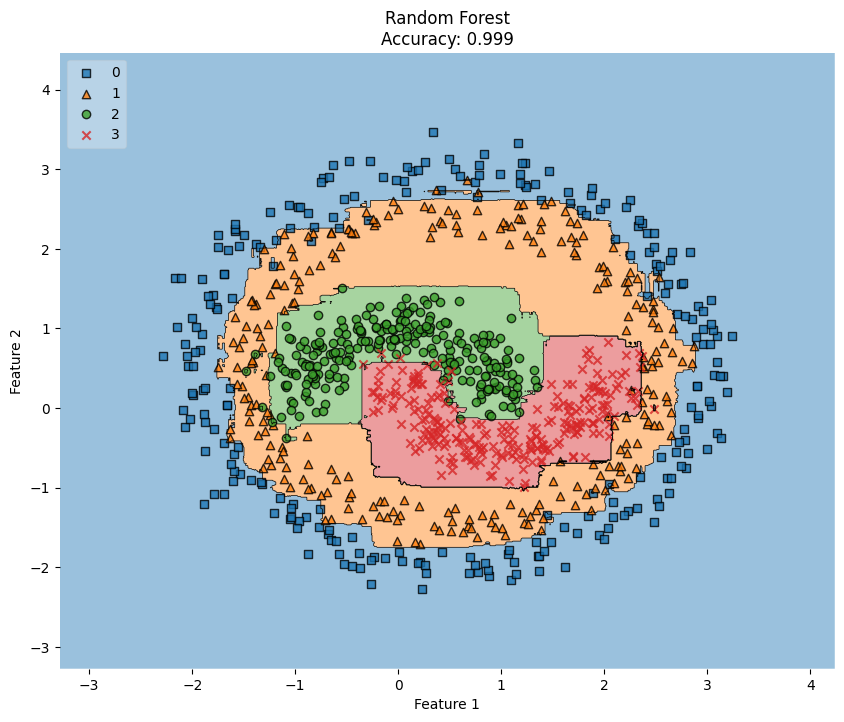


Detailed Classification Reports:

Logistic Regression with Polynomial Features:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       250
           1       0.91      0.92      0.91       250
           2       0.96      0.96      0.96       250
           3       0.95      0.95      0.95       250

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000


RBF Kernel SVM:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       250
           1       0.90      0.91      0.91       250
           2       0.96      0.96      0.96       250
           3       0.96      0.95      0.95       250

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000


Random Forest:
              pr

In [13]:
# Generate datasets
circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)

# Combine datasets
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2))

def plot_decisions(X, y, estimator, title):
    """Plot decision regions for a classifier"""
    plt.figure(figsize=(10, 8))
    plot_decision_regions(X, y, clf=estimator, legend=2)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# 1. Logistic Regression with Polynomial Features
poly_lr = Pipeline([
    ('poly', PolynomialFeatures(degree=4, include_bias=False)),
    ('lr', LogisticRegression(C=1.0, max_iter=2000, multi_class='multinomial'))
])
poly_lr.fit(points, labels)
poly_lr_pred = poly_lr.predict(points)
poly_lr_accuracy = accuracy_score(labels, poly_lr_pred)

plot_decisions(points, labels, poly_lr,
              f'Logistic Regression with Polynomial Features (degree=4)\nAccuracy: {poly_lr_accuracy:.3f}')

# 2. SVM with RBF Kernel
rbf_svm = SVC(kernel='rbf', C=10.0, gamma=0.5, random_state=42)
rbf_svm.fit(points, labels)
rbf_svm_pred = rbf_svm.predict(points)
rbf_svm_accuracy = accuracy_score(labels, rbf_svm_pred)

plot_decisions(points, labels, rbf_svm,
              f'RBF Kernel SVM\nAccuracy: {rbf_svm_accuracy:.3f}')

# 3. Random Forest (additional strong model)
rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf.fit(points, labels)
rf_pred = rf.predict(points)
rf_accuracy = accuracy_score(labels, rf_pred)

plot_decisions(points, labels, rf,
              f'Random Forest\nAccuracy: {rf_accuracy:.3f}')

# Print detailed results
print("\nDetailed Classification Reports:")
print("\nLogistic Regression with Polynomial Features:")
print(classification_report(labels, poly_lr_pred))

print("\nRBF Kernel SVM:")
print(classification_report(labels, rbf_svm_pred))

print("\nRandom Forest:")
print(classification_report(labels, rf_pred))

# Print summary
print("\nAccuracy Summary:")
print(f"Polynomial Logistic Regression: {poly_lr_accuracy:.3f}")
print(f"RBF Kernel SVM: {rbf_svm_accuracy:.3f}")
print(f"Random Forest: {rf_accuracy:.3f}")

# Feature importance for Random Forest
if hasattr(rf, 'feature_importances_'):
    print("\nRandom Forest Feature Importances:")
    for i, importance in enumerate(rf.feature_importances_):
        print(f"Feature {i+1}: {importance:.3f}")

1. Производительность модели:
- Random Forest является явным победителем с почти идеальной точностью (0,999)
- Как RBF SVM (0,940), так и полиномиальный LR (0,941) работают очень похоже.

2. Подробный анализ производительности:
- Случайный лес:
  - Получены отличные оценки по всем показателям (точность, отзывчивость, f1-оценка = 1,00)
  - Не показано различий между классами
  - Важность функции показывает, что обе функции одинаково важны (функция 1: 0,438, функция 2: 0,562)

- Логистическая регрессия с полиномиальными характеристиками:
  - Очень стабильная производительность в разных классах (диапазон 0,91-0,96)
  - В классах 0, 2 и 3 (формы луны) показатели немного лучше, чем в классе 1 (круги)

- RBF SVM:
  - Производительность практически идентична полиномиальной LR
  - Также производительность в классе 1 немного ниже (0,90-0,91) по сравнению с другими классами

3. Основные характеристики:
- Ансамблевый подход на основе дерева (случайный лес) значительно лучше справляется с этим набором данных со смешанными шаблонами, чем методы ядра и подходы к разработке функций.
- Схожая производительность Polynomial LR и RBF SVM позволяет предположить, что как явное преобразование объектов, так и трюк с ядром одинаково эффективны для решения этой задачи
- Как круговые, так и лунные модели хорошо отображаются во всех моделях, но Random Forest удается найти идеальные границы принятия решений

4. Лучший выбор модели:
- Очевидно, что оптимальным выбором здесь является случайный лес, который обеспечивает:
  - Идеальную точность классификации
  - Отсутствие необходимости в разработке признаков
  - Сбалансированную важность признаков
  - Высокую производительность во всех классах
